In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [80]:
dataset = pd.read_csv("TUANDROMD.csv")
dataset

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,goodware
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware


In [82]:
dataset.describe()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000
mean,0.000896,0.000896,0.004928,0.083333,0.006944,0.087814,0.022849,0.023746,0.000224,0.596326,...,0.051971,0.173163,0.245520,0.215950,0.091622,0.088710,0.056228,0.133065,0.013665,0.150090
std,0.029924,0.029924,0.070037,0.276416,0.083053,0.283055,0.149440,0.152272,0.014967,0.490689,...,0.221994,0.378431,0.430443,0.411526,0.288524,0.284356,0.230387,0.339682,0.116108,0.357199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
dataset['Label'].value_counts(normalize=True)

Label
malware     0.798611
goodware    0.201389
Name: proportion, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def get_Xy(dataset,label="Label"):
    X = dataset.drop(label, axis=1)
    y = dataset[label]
    return X,y

def map_label(y):
    y = y.map({'goodware': 0, 'malware': 1})
    return y

def handle_missing_values(dataset):
    # drop row
    dataset = dataset.dropna()
    return dataset

def split(X,y,ratio,seed=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed)
    return X_train, X_test, y_train, y_test

def normalize(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test , scaler
    
def preprocess(dataset, ratio,label="Label", seed=1):
    dataset = handle_missing_values(dataset)
    X,y = get_Xy(dataset,"Label")
    y = map_label(y)
    X_train, X_test, y_train, y_test = split(X,y,ratio,seed)
    # X_train, X_test, scaler = normalize(X_train, X_test) # REMOVED NORMALIZATION
    return X_train, X_test, y_train, y_test , X , y

In [86]:
X_train, X_test, y_train, y_test , X , y = preprocess(dataset, 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3571, 241) (893, 241) (3571,) (893,)


In [87]:
clfs = [
    RandomForestClassifier(),
    ExtraTreeClassifier(),
    AdaBoostClassifier(algorithm="SAMME"),
    XGBClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True),
    LogisticRegression()
]

# Define scoring metrics
scoring = {
    'auc': 'roc_auc',
    'accuracy': 'accuracy',
    'f1': 'f1'
}

for clf in clfs:
    cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
    
    auc = cv_results['test_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    f1 = cv_results['test_f1'].mean()
    
    # Print results
    print(f"{clf.__class__.__name__} Results: AUC={auc:.4f}, Accuracy={accuracy:.4f}, F1={f1:.4f}")

RandomForestClassifier Results: AUC=0.9997, Accuracy=0.9948, F1=0.9968
ExtraTreeClassifier Results: AUC=0.9826, Accuracy=0.9890, F1=0.9932
AdaBoostClassifier Results: AUC=0.9945, Accuracy=0.9756, F1=0.9848
XGBClassifier Results: AUC=0.9996, Accuracy=0.9926, F1=0.9954
GradientBoostingClassifier Results: AUC=0.9986, Accuracy=0.9832, F1=0.9896
SVC Results: AUC=0.9988, Accuracy=0.9870, F1=0.9918
LogisticRegression Results: AUC=0.9977, Accuracy=0.9825, F1=0.9891


In [75]:
# Random Forest , Extra Tree , Ada Boosting  , Xgboost , Gradient Boosting , Logistic Regression , SVM
scoring = {
    'AUC': 'roc_auc','accuracy': 'accuracy' , 'f1': 'f1_macro'
}

def get_grid(model,param_grid,cv=10):
    clf = None
    if model == "Random Forest":
        clf = RandomForestClassifier()
    elif model == "Extra Tree":
        clf = ExtraTreeClassifier()
    elif model == "AdaBoost":
        clf = AdaBoostClassifier()
    elif model == "Xgboost":
        clf = XGBClassifier()
    elif model == "Gradient Boosting":
        clf = GradientBoostingClassifier()
    elif model == "Logistic Regression":
        clf = LogisticRegression()
    elif model == "SVM":
        clf = SVC(probability=True)
    return GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        refit='f1',
        return_train_score=True,
        n_jobs=-1
    )


In [38]:
param_grid_lr = {
    'penalty': ['l2'],
    'C': [10e-4,10e-3,10e-2,0.1, 1, 10,100,1000,10000,10e5,10e6],
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2
}

grid_search_lr = get_grid("Logistic Regression",param_grid_lr)

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.1, 1, 10, 100, 1000, 10000,
                               1000000.0, 10000000.0],
                         'penalty': ['l2'], 'solver': ['liblinear']},
             refit='f1', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'accuracy': 'accuracy',
                      'f1': 'f1_macro'})

In [39]:
grid_search_lr.best_estimator_

LogisticRegression(C=100, solver='liblinear')

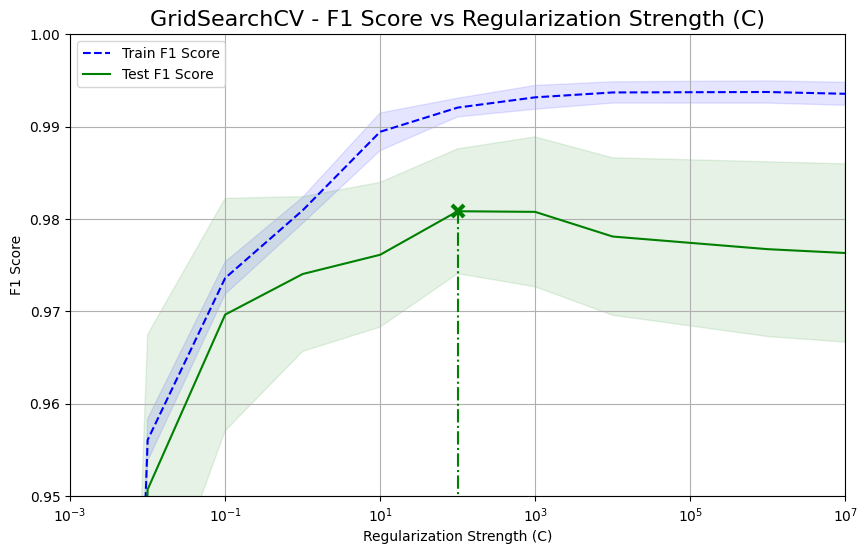

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Code modified from
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

results = grid_search_lr.cv_results_ 

plt.figure(figsize=(10, 6))
plt.title("GridSearchCV - F1 Score vs Regularization Strength (C)", fontsize=16)
plt.xlabel("Regularization Strength (C)")
plt.ylabel("F1 Score")

ax = plt.gca()
ax.set_xscale('log')  # Set x-axis to log scale
ax.set_xlim(min(results["param_C"]), max(results["param_C"]))  # Set x-axis limits based on C values
ax.set_ylim(0.95, 1.0)  # Set y-axis limits for F1 score

# Extract regularization values (C) and F1 scores
X_axis = np.array(results["param_C"].data, dtype=float)  # Regularization strength (C)

# Test scores
f1_test_mean = results["mean_test_f1"]  # Mean F1 score for test sets
f1_test_std = results["std_test_f1"]  # Standard deviation of F1 scores for test sets

# Train scores
f1_train_mean = results["mean_train_f1"]  # Mean F1 score for train sets
f1_train_std = results["std_train_f1"]  # Standard deviation of F1 scores for train sets

# Plot the mean train F1 score with error bands
ax.fill_between(
    X_axis,
    f1_train_mean - f1_train_std,
    f1_train_mean + f1_train_std,
    alpha=0.1,
    color="b",
)
ax.plot(
    X_axis,
    f1_train_mean,
    linestyle="--",
    color="b",
    label="Train F1 Score",
)

# Plot the mean test F1 score with error bands
ax.fill_between(
    X_axis,
    f1_test_mean - f1_test_std,
    f1_test_mean + f1_test_std,
    alpha=0.1,
    color="g",
)
ax.plot(
    X_axis,
    f1_test_mean,
    linestyle="-",
    color="g",
    label="Test F1 Score",
)

# Highlight the best test score
best_index = np.nonzero(results["rank_test_f1"] == 1)[0][0]
best_score = f1_test_mean[best_index]
best_C = X_axis[best_index]

# Plot a dotted vertical line at the best score
ax.plot(
    [best_C] * 2,
    [0, best_score],
    linestyle="-.",
    color="g",
    marker="x",
    markeredgewidth=3,
    ms=8,
)

# Annotate the best score
ax.annotate(
    f"Best F1: {best_score:.2f}",
    (best_C, best_score + 0.02),
    fontsize=12,
    color="g",
)

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [41]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

grid_search_rf = get_grid("Random Forest",param_grid_rf,cv=10)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
grid_search_rf.best_score_

0.9843175599727679

In [43]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, max_features=None)

In [44]:
param_grid_extra_tree = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}


grid_search_extra_tree = get_grid("Extra Tree",param_grid_extra_tree,cv=10)
grid_search_extra_tree.fit(X_train, y_train)
grid_search_extra_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [45]:
grid_search_extra_tree.best_score_

0.9829937342188743

In [46]:
grid_search_extra_tree.best_estimator_

ExtraTreeClassifier(max_depth=10, max_features=None)

In [48]:
param_grid_ada = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ada = get_grid("AdaBoost",param_grid_ada,cv=10)
grid_search_ada.fit(X_train, y_train)
grid_search_ada.best_params_

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 400}

In [49]:
grid_search_ada.best_score_

0.9705037412839115

In [50]:
grid_search_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [51]:
param_grid_xgboost = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid_search_xgboost = get_grid("Xgboost",param_grid_xgboost,cv=10)
grid_search_xgboost.fit(X_train, y_train)
grid_search_xgboost.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [52]:
grid_search_xgboost.best_score_

0.9878792451638108

In [53]:
grid_search_xgboost.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
param_grid_gradient = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

grid_search_gradient = get_grid("Gradient Boosting",param_grid_gradient,cv=10)
grid_search_gradient.fit(X_train, y_train)
grid_search_gradient.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

In [55]:
grid_search_gradient.best_score_

0.9874333259340113

In [56]:
grid_search_gradient.best_estimator_

GradientBoostingClassifier(max_depth=10, n_estimators=200)

In [76]:
param_grid_svm = {
    'C': [10e-4,10e-3,10e-2,0.1, 1, 10,100],
    'gamma': ['auto','scale'],
    'kernel': ['rbf','linear']
}

grid_search_svm = get_grid("SVM",param_grid_svm,cv=10)
grid_search_svm.fit(X_train, y_train)
grid_search_svm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [77]:
grid_search_svm.best_score_

0.9887066920977496

In [78]:
grid_search_svm.best_estimator_

SVC(C=10, probability=True)

In [79]:
all_best = [
    grid_search_extra_tree.best_estimator_,
    grid_search_ada.best_estimator_,
    grid_search_gradient.best_estimator_,
    grid_search_svm.best_estimator_,
    grid_search_rf.best_estimator_,
    grid_search_lr.best_estimator_,
    grid_search_xgboost.best_estimator_
]
scores = [(
    est,
    { 
     "f1" : f1_score(y_test, est.predict(X_test)),
     "AUC" : roc_auc_score(y_test, est.predict_proba(X_test)[:, 1]),
     "acc" : accuracy_score(y_test, est.predict(X_test)),
     "f1_train" : f1_score(y_train, est.predict(X_train)),
     "AUC_train" : roc_auc_score(y_train, est.predict_proba(X_train)[:, 1]),
     "acc_train" : accuracy_score(y_train, est.predict(X_train))
    }
    ) 
          for est in all_best]
for est,score in scores:
    print(f"{est.__class__.__name__} score")


ExtraTreeClassifier score
AdaBoostClassifier score
GradientBoostingClassifier score
SVC score
RandomForestClassifier score
LogisticRegression score
XGBClassifier score
